# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from pandas import Series
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,confusion_matrix

# Import the dataset

In [2]:
df = pd.read_csv('Loan Prediction.csv')

# Collecting information on the dataset

In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# show categorical data in the dataset and its values
def unique_data():
 print(f'the unique values of Dependents: {df["Dependents"].unique()}')
 print(f'the unique values of Loan_Amount_Term: {sorted(df["Loan_Amount_Term"].unique())}')
 print(f'the unique values of Property_Area: {df["Property_Area"].unique()}')
 print(f'the unique values of Gender: {df["Gender"].unique()}')
 print(f'the unique values of Married: {df["Married"].unique()}')
 print(f'the unique values of Education: {df["Education"].unique()}')
 print(f'the unique values of Self_Employed: {df["Self_Employed"].unique()}')
 print(f'the unique values of Credit_History: {df["Credit_History"].unique()}')
unique_data()

the unique values of Dependents: ['0' '1' '2' '3+' nan]
the unique values of Loan_Amount_Term: [12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 360.0, nan, 300.0, 480.0]
the unique values of Property_Area: ['Urban' 'Rural' 'Semiurban']
the unique values of Gender: ['Male' 'Female' nan]
the unique values of Married: ['No' 'Yes' nan]
the unique values of Education: ['Graduate' 'Not Graduate']
the unique values of Self_Employed: ['No' 'Yes' nan]
the unique values of Credit_History: [ 1.  0. nan]


# Data Cleansing

In [7]:
sum(df.duplicated(subset = 'Loan_ID')) == 0

True

In [8]:
df.drop("Loan_ID",axis=1,inplace=True)

In [9]:
# check the missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
missing =['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for i in missing[:7]: 
  # fill the categorical data with the mode of the column
    df[i].fillna(df[i].mode()[0],inplace=True)

In [11]:
#fill the continuous data with the mean to avoid outliers
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

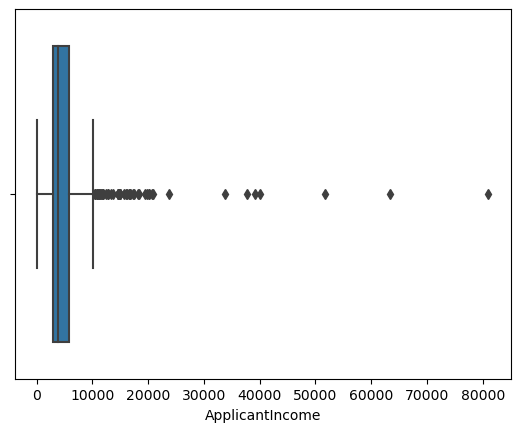

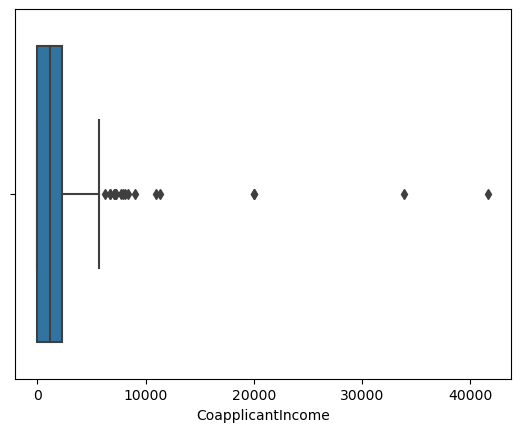

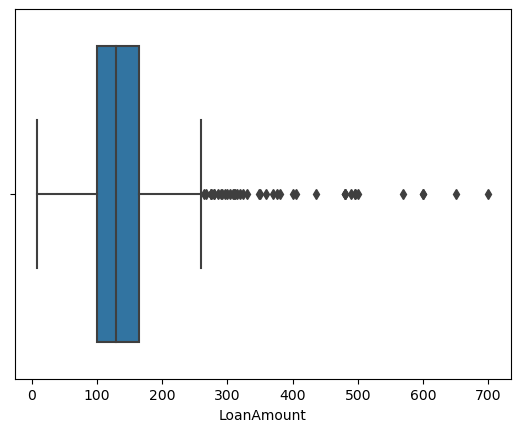

In [13]:
# check outliers
def print_ol():
 sns.boxplot(data=df , x = 'ApplicantIncome' , hue = 'Loan_Status')
 plt.show()
 sns.boxplot(data=df , x = 'CoapplicantIncome' , hue = 'Loan_Status')
 plt.show()
 sns.boxplot(data=df , x = 'LoanAmount' , hue = 'Loan_Status')
 plt.show()
print_ol()

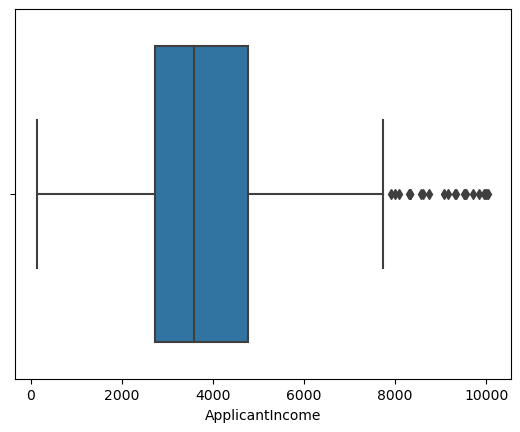

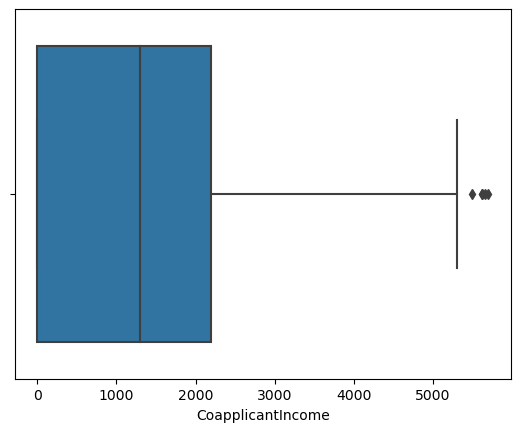

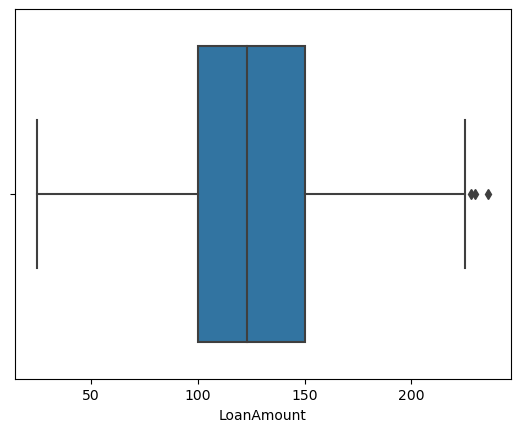

In [14]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    lower= q25-(iqr * 1.5)
    upper= (iqr*1.5)+q75
    # identify outliers
    outliers=( ( df[col] < lower) | (df[col] > upper) )
    outlier_index= df[outliers].index
    df.drop(outlier_index,inplace=True)
    
print_ol()

# Data Visualization

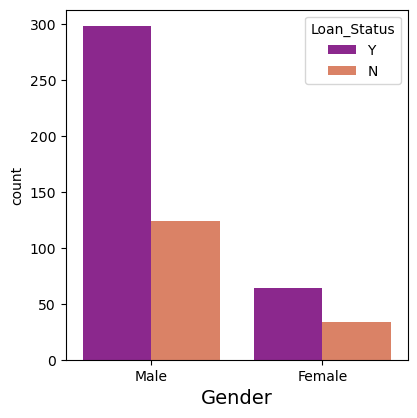

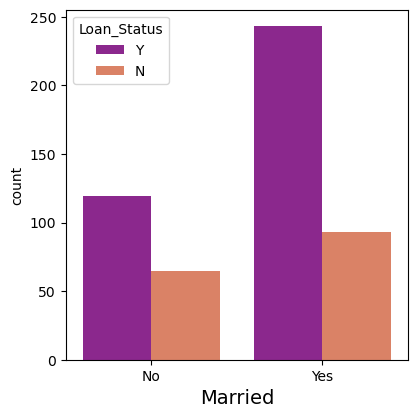

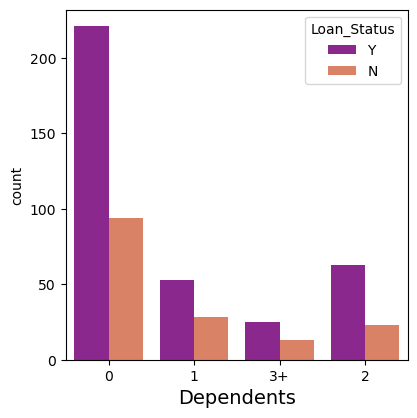

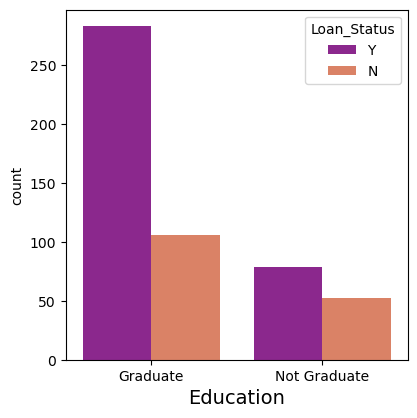

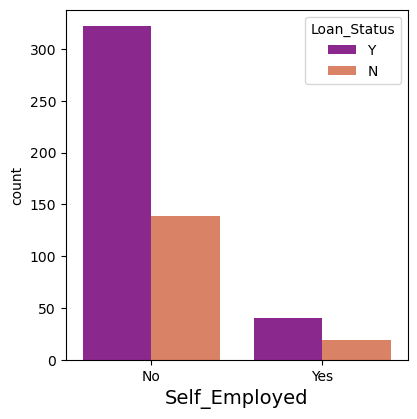

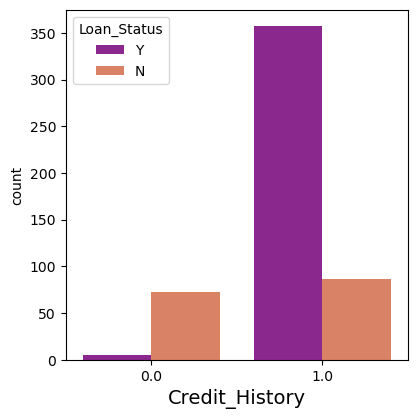

In [15]:
col=['Gender','Married','Dependents','Education','Self_Employed','Credit_History']
for i in col[:7]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

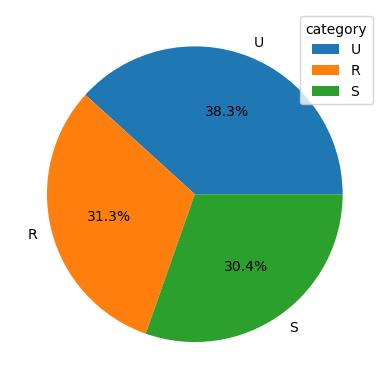

In [16]:
y = df['Property_Area']
d=df['Property_Area'].value_counts()
#create a dictionary
d=dict(d)
mylabels = ['U', 'R', 'S']
plt.pie(d.values(), labels = mylabels,autopct='%1.1f%%')
plt.legend(title="category")

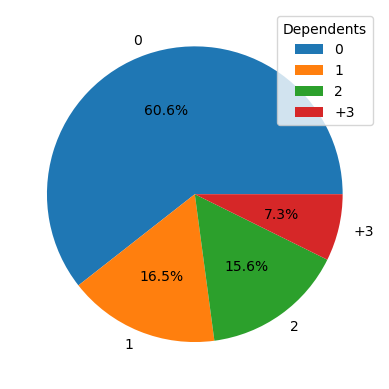

In [17]:
y = df['Dependents']
d=df['Dependents'].value_counts()
d=dict(d)
mylabels = ['0', '1','2','+3']
plt.pie(d.values(), labels = mylabels,autopct='%1.1f%%')
plt.legend(title="Dependents")

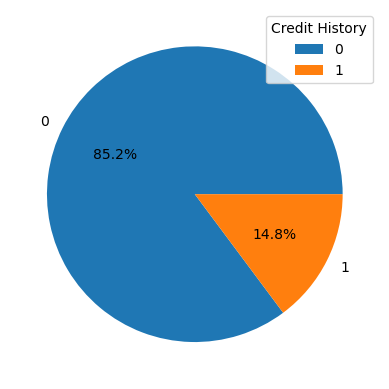

In [18]:
y = df['Credit_History']
d=df['Credit_History'].value_counts()
d=dict(d)
mylabels = ['0', '1']
plt.pie(d.values(), labels = mylabels,autopct='%1.1f%%')
plt.legend(title="Credit History")

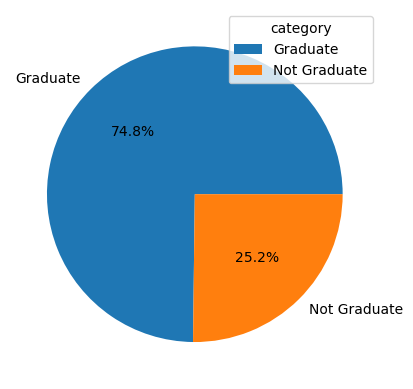

In [19]:

y = df['Education']
d=df['Education'].value_counts()
d=dict(d)
mylabels = ['Graduate', 'Not Graduate']
plt.pie(d.values(), labels = mylabels,autopct='%1.1f%%')
plt.legend(title="category")

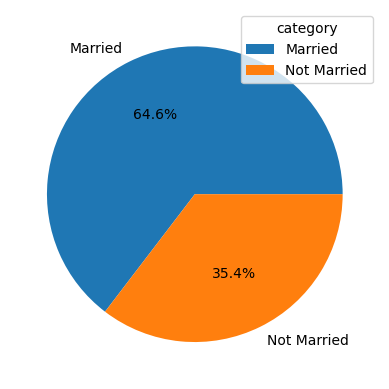

In [20]:
y = df['Married']
d=df['Married'].value_counts()
d=dict(d)
mylabels = ['Married', 'Not Married']
plt.pie(d.values(), labels = mylabels,autopct='%1.1f%%')
plt.legend(title="category")

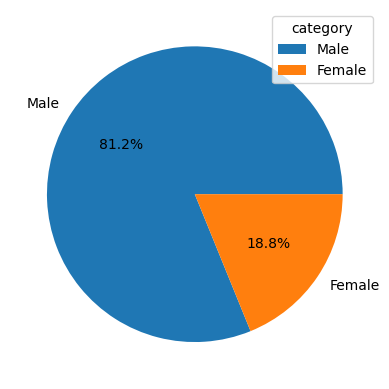

In [21]:
y = df['Gender']
d=df['Gender'].value_counts()
d=dict(d)
mylabels = ['Male', 'Female']
plt.pie(d.values(), labels = mylabels,autopct='%1.1f%%')
plt.legend(title="category")

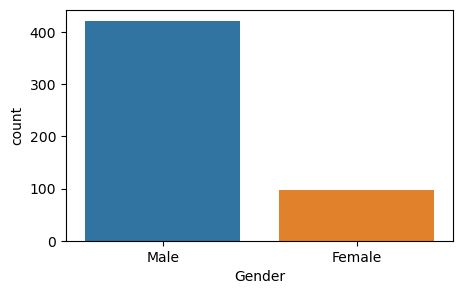

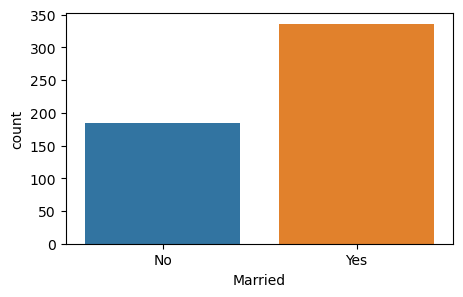

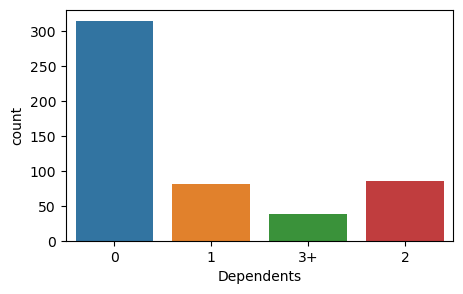

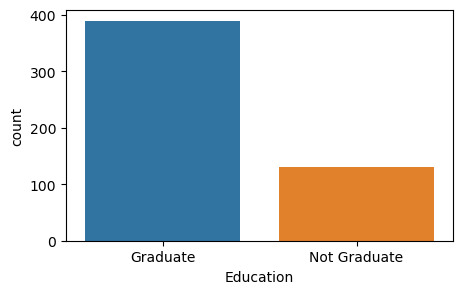

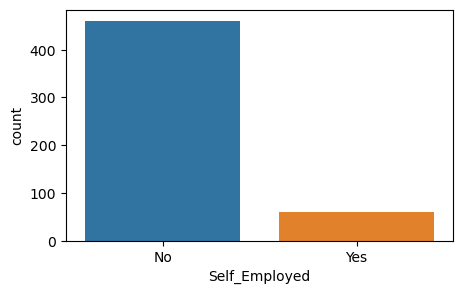

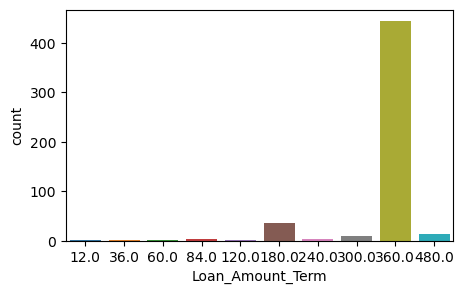

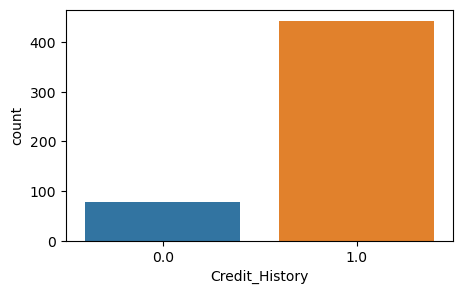

In [22]:
col2=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property Area']
# display count figure for each column except the last one
for i in col2[:-1]:
  # figsize = ( width , length ) in pixels
 plt.figure(figsize = (5,3))
 sns.countplot(  data = df , x = i )
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

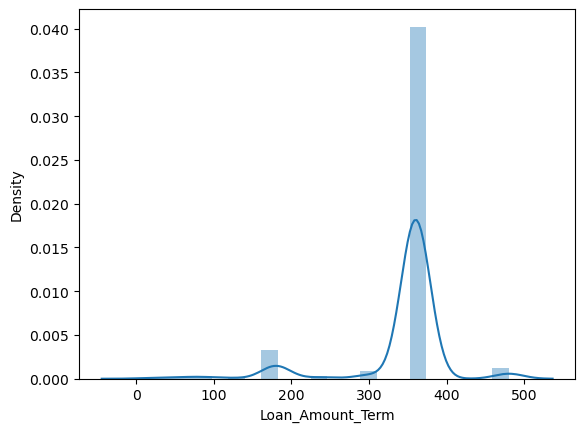

In [23]:
#to make sure that Loan_amount_term is a discrete value
sns.distplot(df['Loan_Amount_Term'])

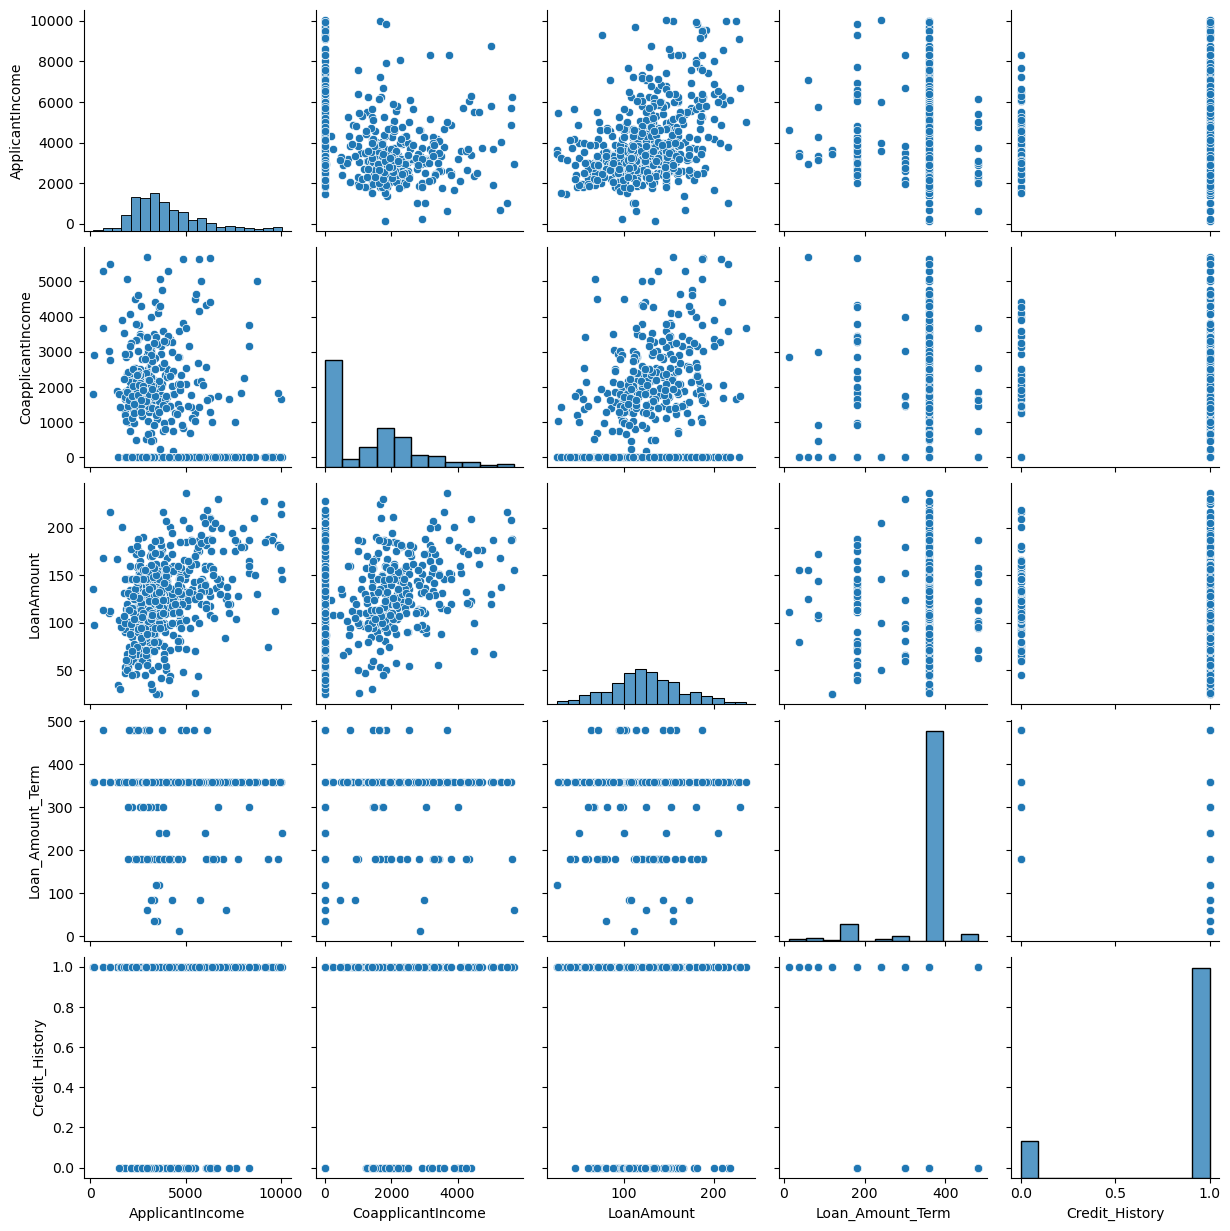

In [24]:
sns.pairplot(df)

# Encoding Categorical Data

In [25]:
cols_to_encode = ['Education', 'Married','Gender','Self_Employed','Loan_Status','Loan_Amount_Term','Property_Area']

label_encoder = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [26]:
df['Dependents'] = df['Dependents'].replace(['3+'], [int('3')])
df['Dependents'] = df['Dependents'].replace(['0'], [int('0')])
df['Dependents'] = df['Dependents'].replace(['1'], [int('1')])
df['Dependents'] = df['Dependents'].replace(['2'], [int('2')]) 

# Feature Selection and Extraction

<AxesSubplot:>

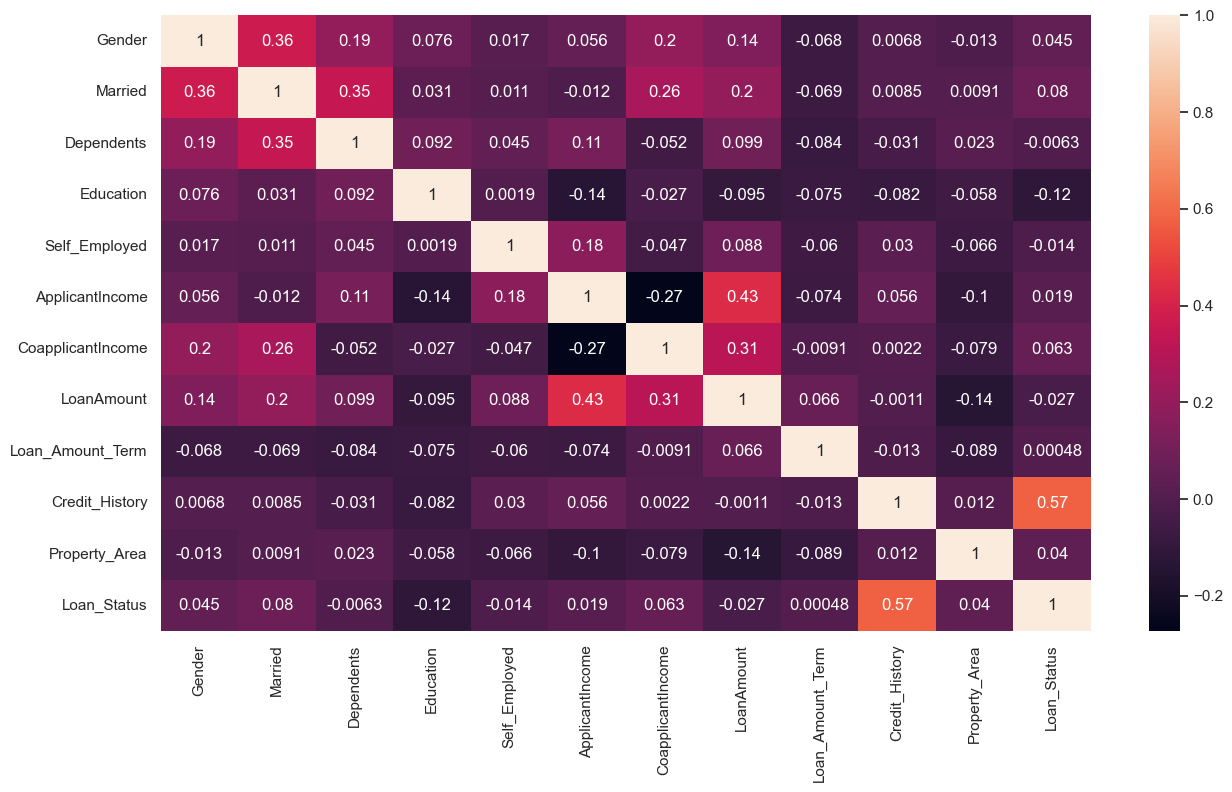

In [27]:
# using correlation
df.corr()
sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(df.corr(),annot=True)

In [28]:
#using chi-squared
dfs=df[['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Loan_Amount_Term',  'Credit_History',  'Property_Area', 'Loan_Status']]
x_temp=dfs.drop("Loan_Status",axis=1)
y_temp=dfs['Loan_Status']
chi_scores=chi2(x_temp,y_temp)
chi_scores

(array([1.99795896e-01, 1.16318823e+00, 2.85397523e-02, 5.36803727e+00,
        9.22679196e-02, 2.02821913e-05, 2.52103328e+01, 5.09129843e-01]),
 array([6.54885643e-01, 2.80805309e-01, 8.65846097e-01, 2.05090427e-02,
        7.61313525e-01, 9.96406679e-01, 5.14060438e-07, 4.75515783e-01]))

<AxesSubplot:>

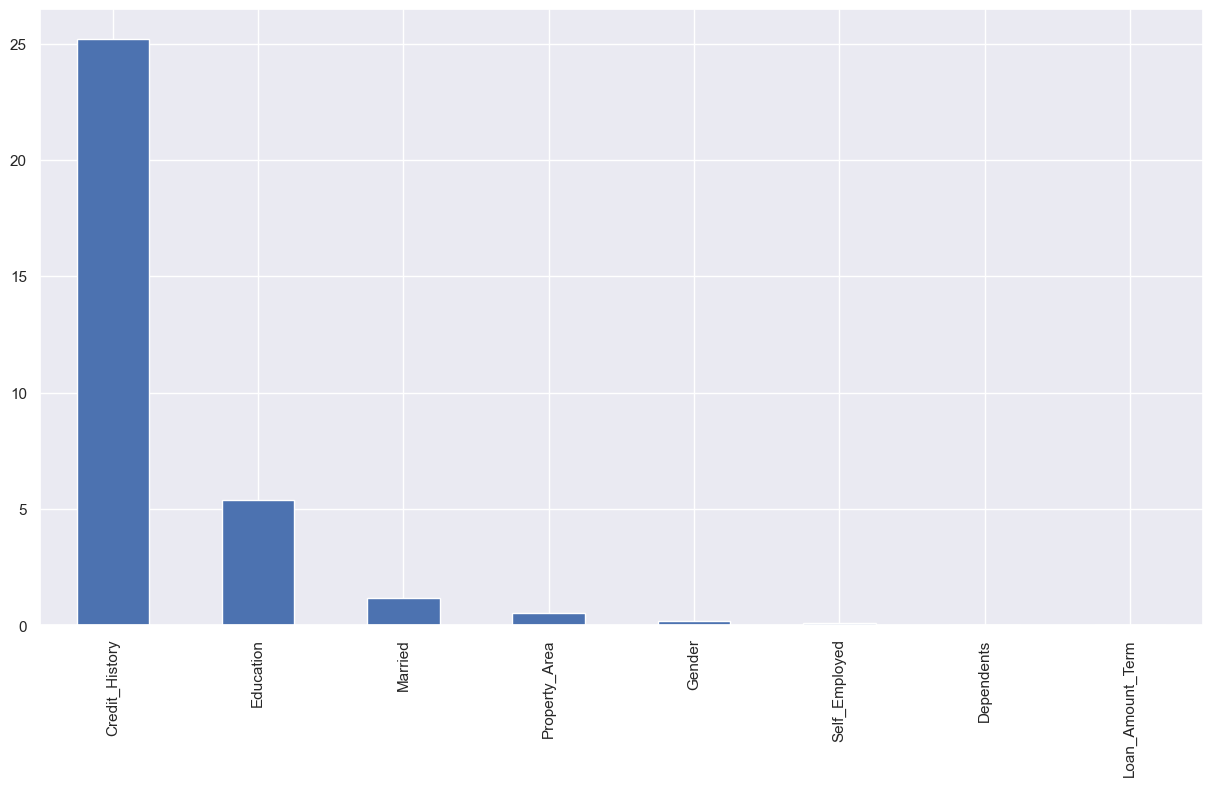

In [29]:
#the higher the chi value, the more important the feature
chi_values=pd.Series(chi_scores[0],index=x_temp.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

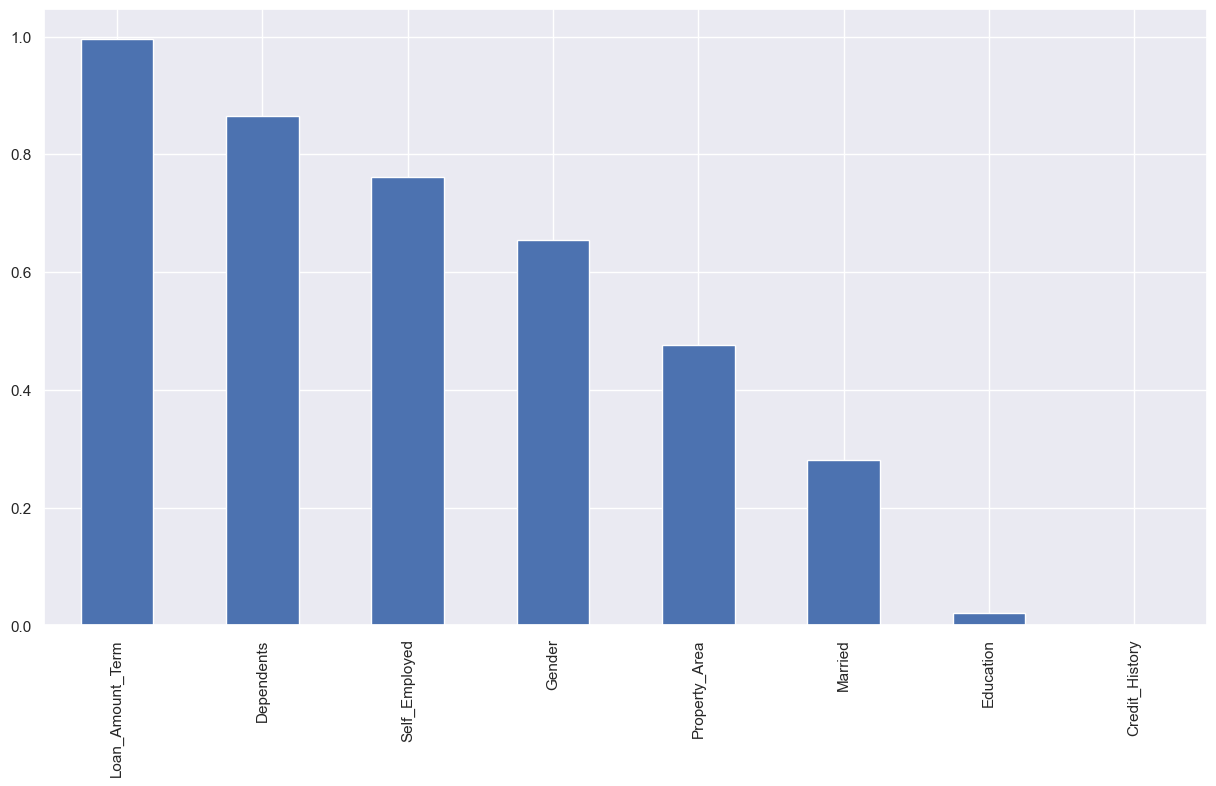

In [30]:
#the lower the p value the more important the feature
p_values=pd.Series(chi_scores[1],index=x_temp.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [31]:
df.drop("Loan_Amount_Term",axis=1,inplace=True)
df.drop("Dependents",axis=1,inplace=True)
df.drop("Self_Employed",axis=1,inplace=True)

# Data Splitting

In [32]:
X = df.iloc[:, 0:8].values
Y = df.iloc[:, 8].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=0)

# Feature Scaling

In [34]:
income = df['ApplicantIncome']
coincome = df['CoapplicantIncome']
lamount=df['LoanAmount']

In [35]:
#Normalization
scaler = MinMaxScaler()
income_scaled = scaler.fit_transform(income.values.reshape(-1,1))
lamount_scaled = scaler.transform(lamount.values.reshape(-1,1))

In [36]:
#Standardization
scaler=StandardScaler()
coincome_scaled=scaler.fit_transform(coincome.values.reshape(-1,1))

In [37]:
df['ApplicantIncome'] = income_scaled
df['LoanAmount']=lamount_scaled
df['CoapplicantIncome']=coincome_scaled

In [38]:
df.head(10)

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0.575831,-0.943785,0.575413,1.0,2,1
1,1,1,0,0.447914,0.136399,0.488152,1.0,0,0
2,1,1,0,0.287966,-0.943785,0.194313,1.0,2,1
3,1,1,1,0.245832,0.745256,0.450237,1.0,2,1
4,1,0,0,0.591088,-0.943785,0.549763,1.0,2,1
6,1,1,1,0.220572,0.142130,0.331754,1.0,2,1
7,1,1,0,0.291604,0.849836,0.630332,0.0,1,0
8,1,1,0,0.389613,0.149293,0.677725,1.0,2,1
10,1,1,0,0.308174,-0.442373,0.213270,1.0,2,1
11,1,1,0,0.237446,0.374212,0.398104,1.0,2,1


# Training

In [39]:
#Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [40]:
# using SVM model
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [41]:
# using Decision Tree model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
# using XG boost model 
xgbModel = XGBClassifier(max_depth=3, subsample=1, n_estimators=50, min_child_weight=1, random_state=5)
xgbModel.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=5, ...)

# Testing

In [43]:
# Using Logistic Regression Model
y_pred = classifier.predict(X_test)
logisticAcc=accuracy_score(y_pred,y_test)*100
print('Classification report: \n',classification_report(y_test, y_pred))
print(f"Accuracy: {round(logisticAcc,2)}%")
print('Mean Squared Error : ', round(mean_squared_error(np.asarray(y_test), y_pred),2))
print('Confusion matrix :\n ', confusion_matrix(y_test,y_pred))


Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.52      0.66        50
           1       0.81      0.97      0.88       106

    accuracy                           0.83       156
   macro avg       0.85      0.75      0.77       156
weighted avg       0.84      0.83      0.81       156

Accuracy: 82.69%
Mean Squared Error :  0.17
Confusion matrix :
  [[ 26  24]
 [  3 103]]


In [44]:
# Using SVM Model
clf = SVC(kernel='linear',C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
svm_acc = accuracy_score(y_pred,y_test)*100
print('Classification report: \n',classification_report(y_test, y_pred))
print(f"Accuracy: {round(svm_acc,2)}%")
print('Mean Squared Error : ', round(mean_squared_error( np.asarray(y_test), y_pred),2))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.52      0.66        50
           1       0.81      0.97      0.88       106

    accuracy                           0.83       156
   macro avg       0.85      0.75      0.77       156
weighted avg       0.84      0.83      0.81       156

Accuracy: 82.69%
Mean Squared Error :  0.17
Confusion matrix : 
 [[ 26  24]
 [  3 103]]


In [45]:
# Using Decision Tree Model
y_predict = DT.predict(X_test)
decisionAcc = accuracy_score(y_predict,y_test)*100
print('Classification report: \n',classification_report(y_test, y_predict))
print(f"Accuracy: {round(decisionAcc,2)}%")
print('Mean Squared Error : ', round(mean_squared_error(np.asarray(y_test), y_predict),2))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.60      0.58        50
           1       0.80      0.77      0.79       106

    accuracy                           0.72       156
   macro avg       0.68      0.69      0.68       156
weighted avg       0.72      0.72      0.72       156

Accuracy: 71.79%
Mean Squared Error :  0.28
Confusion matrix : 
 [[ 26  24]
 [  3 103]]


In [46]:
# Using XG Boost Model
y_predict = xgbModel.predict(X_test)
xgbAcc=accuracy_score(y_test, y_predict)*100
print('Classification report:\n',classification_report(y_test, y_predict))
print(f"Accuracy: {round(xgbAcc,2)}%")
print('Mean Squared Error : ',round( mean_squared_error(np.asarray(y_test), y_predict),2))
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.64      0.76        50
           1       0.85      0.98      0.91       106

    accuracy                           0.87       156
   macro avg       0.90      0.81      0.84       156
weighted avg       0.88      0.87      0.86       156

Accuracy: 87.18%
Mean Squared Error :  0.13
Confusion matrix :
 [[ 26  24]
 [  3 103]]


In [47]:
score = [ round(xgbAcc,2), round(logisticAcc,2) , round(svm_acc,2) ,round(decisionAcc,2)]
Models = pd.DataFrame({'Algorithm': ["XG boost","Logistic Regression","SVM","Decision Tree"],'Accuracy': score})
Models.sort_values(by='Accuracy', ascending=False)

,Algorithm,Accuracy
0,XG boost,87.18
1,Logistic Regression,82.69
2,SVM,82.69
3,Decision Tree,71.79


# Saving Model

In [48]:
joblib_file = "LoanPrediction_model"
joblib.dump(xgbModel, joblib_file)

loaded_model = joblib.load(open(joblib_file, 'rb'))
pred_Y = loaded_model.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred_Y), 2)
print(accuracy)

0.87
